# Q1. 

The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

Country Codes :

Country Code ---- Country

1	India

14  Australia

30  Brazil

37  Canada

94  Indonesia

148 New Zealand

162 Phillipines

166 Qatar

184 Singapore

189 South Africa

191 Sri Lanka

208 Turkey

214 UAE

215 United Kingdom

216 United States

# Q1.1.
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

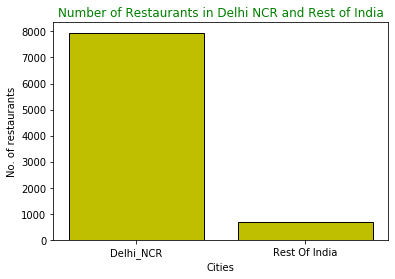

In [289]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
df=df[(df["Country Code"]==1)]

NCR_cities=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

a=df[df.City.isin(NCR_cities)]
a=a['City'].value_counts().sum()

b=df[~df.City.isin(NCR_cities)]
b=b['City'].value_counts().sum()



plt.bar(['Delhi_NCR','Rest Of India'],[a,b], color='y', edgecolor='black')
plt.xlabel('Cities')
plt.ylabel('No. of restaurants')
plt.title("Number of Restaurants in Delhi NCR and Rest of India", color='green')
plt.show()

# Q1.2.
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [290]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
df=df[(df["Country Code"]==1)]

NCR_cities=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']
servedInNCR=set()
serevedInROI=set()

for i in df.index:
    if df["City"][i] in NCR_cities:
        c=df["Cuisines"][i].strip().split(',')
        for j in c:
            servedInNCR.add(j.strip())
    else:
        c=df["Cuisines"][i].strip().split(',')
        for j in c:
            serevedInROI.add(j.strip())
            
for i in (serevedInROI- servedInNCR):
    print(i)
            

Malwani
Cajun
German
BBQ


# Q1.3.

Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
df=df[(df["Country Code"]==1)]

NCR_cities=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

cusinies_NCR={}
b=df[df.City.isin(NCR_cities)]
for i in b.index:
    for j in b['Cuisines'][i].split(','):
        j=j.strip()
        if j in cusinies_NCR:
            cusinies_NCR[j]+=1
        else:
            cusinies_NCR[j]=1
            

d1=sorted(cusinies_NCR, key=cusinies_NCR.get, reverse=True)[:10]
print("Top 10 cuisines which are served in Delhi NCR region are:-")
for i in d1:
     print(i)
print()

a=df[~df.City.isin(NCR_cities)]
cus={}
for i in a.index:
    for j in a['Cuisines'][i].split(','):
        j=j.strip()
        if j in cus:
            cus[j]+=1
        else:
            cus[j]=1
            
d2=sorted(cus, key=cus.get, reverse=True)[:10]
print("Top 10 cuisines which are served in Rest of India are:-")
for i in d2:
    print(i)

Top 10 cuisines which are served in Delhi NCR region are:-
North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian

Top 10 cuisines which are served in Rest of India are:-
North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


# Q1.4.
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

By plotting pie charts for Top 10 cuisines served in Delhi NCR region and rest of the India, we can conclude that:
1. In Delhi NCR and rest of India "North India" and "Chinese" cuisines are mostly served.
2. In Delhi NCR "fastfood" and 'Mughlai" is famous whereas in rest of India "Continental" and 'Intalian" is famous.
3. South Indian and Dessertds are almost equally famous in both the areas.
4. In Delhi NCR "Bakery" cuisines are more famous as compared to Cafe cuisines which are famous in rest of India

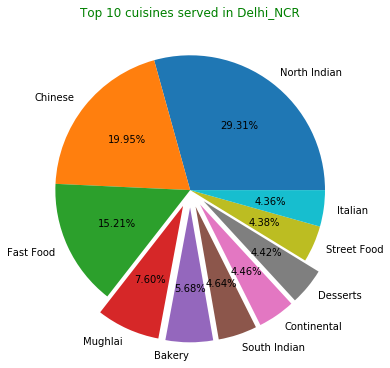

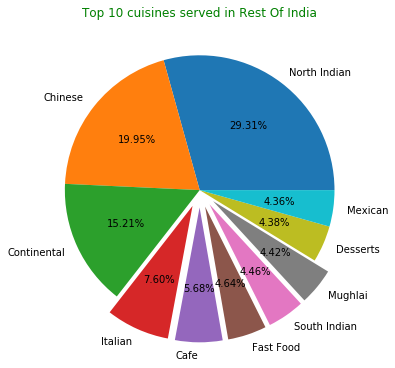

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
df=df[(df["Country Code"]==1)]

NCR_cities=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']

cusinies_NCR={}
b=df[df.City.isin(NCR_cities)]
for i in b.index:
    for j in b['Cuisines'][i].split(','):
        j=j.strip()
        if j in cusinies_NCR:
            cusinies_NCR[j]+=1
        else:
            cusinies_NCR[j]=1
            
d1=sorted(cusinies_NCR.items(), key=lambda x: x[1], reverse=True)
x1=[]
cities=[]
for i in range(10):
    x1.append(d1[i][1])
    cities.append(d1[i][0])

explode=[0,0,0,0.2,0.2,0.2,0.2,0.2,0,0]
plt.title("Top 10 cuisines served in Delhi_NCR", color='green', y=1.27)
plt.pie(x1, labels=cities, autopct="%.2f%%" , explode=explode, radius=1.55)
plt.show()


a=df[~df.City.isin(NCR_cities)]
cus={}
for i in a.index:
    for j in a['Cuisines'][i].split(','):
        j=j.strip()
        if j in cus:
            cus[j]+=1
        else:
            cus[j]=1

d2 =sorted(cus.items(), key=lambda x: x[1], reverse=True)
x2=[]
cities=[]
for i in range(10):
    x2.append(d2[i][1])
    cities.append(d2[i][0])

explode=[0,0,0,0.2,0.2,0.2,0.2,0.2,0,0]
plt.title("Top 10 cuisines served in Rest Of India", color='green', y=1.27)
plt.pie(x1, labels=cities, autopct="%.2f%%" , explode=explode, radius=1.55,)
plt.show()

# Q2.
User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

## 1. Number of Votes given Restaurant


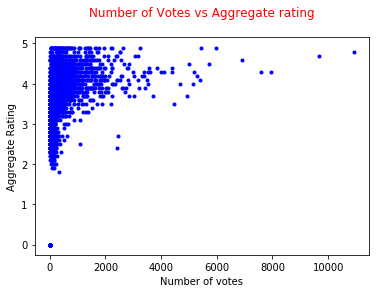

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
# df=df[(df["Country Code"]==1)]

plt.scatter(df["Votes"],df["Aggregate rating"], color='b', marker='.')
plt.xlabel('Number of votes')
plt.ylabel('Aggregate Rating')
plt.title('Number of Votes vs Aggregate rating\n', color='r')

plt.show()

## 2. Restaurant serving more number of cuisines.

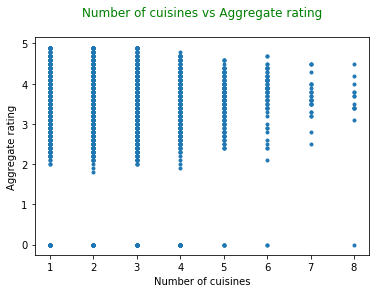

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
# df=df[(df["Country Code"]==1)]
df.dropna(subset=['Cuisines'], inplace=True)

num_of_cuisines=[]

for i in df['Cuisines']:
    num_of_cuisines.append(len(set(i.strip().split(','))))
    
plt.scatter(num_of_cuisines, df['Aggregate rating'],marker='.')
plt.xlabel('Number of cuisines')
plt.ylabel('Aggregate rating')
plt.title('Number of cuisines vs Aggregate rating\n', color='green')
plt.show()    

## 3. Average Cost of Restaurant

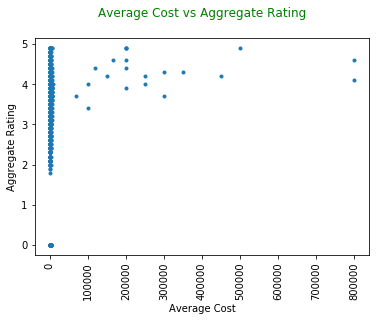

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
# df=df[(df["Country Code"]==1)]

plt.scatter(df['Average Cost for two'], df['Aggregate rating'], marker='.')
plt.xticks(rotation=90)
plt.title("Average Cost vs Aggregate Rating\n", color='Green')
plt.xlabel('Average Cost')
plt.ylabel('Aggregate Rating')

plt.show()

## 4. Restaurant serving some specific cuisines

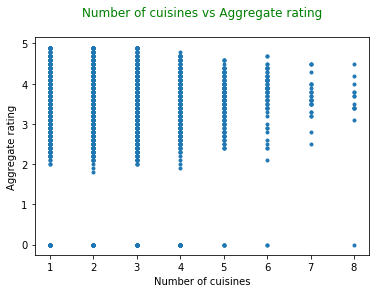

In [296]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
# df=df[(df["Country Code"]==1)]

df.dropna(subset=['Cuisines'], inplace=True)


num_of_cuisines=[]
for i in df['Cuisines']:
    num_of_cuisines.append(len(i.strip().split(',')))
    
plt.scatter(num_of_cuisines, df['Aggregate rating'], marker='.')
plt.xlabel('Number of cuisines')
plt.ylabel('Aggregate rating')
plt.title('Number of cuisines vs Aggregate rating\n', color='green')
plt.show() 

# Q3.
Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

    Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .



In [297]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
# df=df[(df["Country Code"]==1)]

votes_x_rating={}
v={}
for i in df.index:
    loc= df['Locality'][i].strip()
    votes=df["Votes"][i]
    rating=df["Aggregate rating"][i]
    votes_x_rating[loc]=votes_x_rating.get(loc,0)+(votes*rating)
    v[loc]=v.get(loc,0)+votes

weighted_rest_rating={}
for i in votes_x_rating:
    if v[i]==0:
        weighted_rest_rating[i]=0
    else:
        weighted_rest_rating[i]= votes_x_rating[i]/v[i]
        
d1= sorted(weighted_rest_rating, key=weighted_rest_rating.get, reverse= True)[:10]

for i in d1:
    print(i)

Sofitel Philippine Plaza Manila, Pasay City
Setor De Clubes Esportivos Sul
Gíçvea
The Milk District
Windermere
Paia
Kenwood
New Tampa
Venetian Village, Al Maqtaa
Deira City Centre Area


# Q4.  Visualization

## 1. Plot the bar graph top 15 restaurants have a maximum number of outlets.


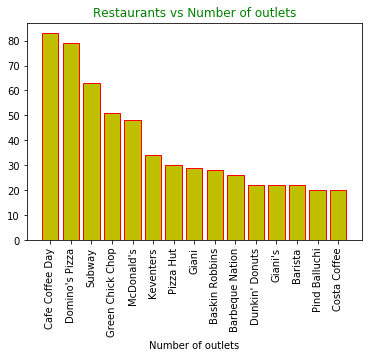

In [298]:
import pandas as pd
import matplotlib.pyplot as plt

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
# df=df[(df["Country Code"]==1)]

res_name={}
for i in df.index:
    res=df['Restaurant Name'][i]
    res_name[res]=res_name.get(res,0)+1
    
restaurants=sorted(res_name, key=res_name.get, reverse=True)[:15]
outlet_count=[]

for i in restaurants:
    outlet_count.append(res_name[i])
    
plt.bar(restaurants,outlet_count,color='y', edgecolor='r')
plt.xticks(rotation=90)
plt.xlabel('Retaurants')
plt.xlabel('Number of outlets')
plt.title("Restaurants vs Number of outlets", color='green')
plt.show()

## 2. Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

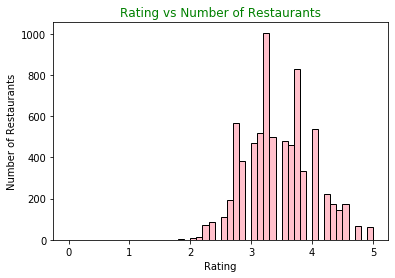

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
# df=df[(df["Country Code"]==1)]

df=df[df['Aggregate rating']!=0.0]
agg_rating=[]

for i in df.index:
    agg_rating.append(df['Aggregate rating'][i])

p= np.arange(0,5.1,0.1)
plt.hist(agg_rating, bins=p, color='pink', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.title('Rating vs Number of Restaurants', color='green')
plt.show()


## 3. Plot the bar graph top 10 restaurants in the data with the highest number of votes.

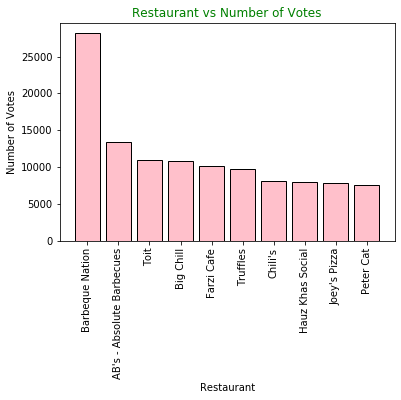

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
# df=df[(df["Country Code"]==1)]

df=df[df['Votes']!=0]

res={}
for i in df.index:
    votes=df['Votes'][i]
    res_name=df['Restaurant Name'][i].strip()
    res[res_name]=res.get(res_name,0)+votes
    
sorted_res= sorted(res, key=res.get, reverse=True)[:10]

x,y=[],[]
for i in sorted_res:
    x.append(i)
    y.append(res[i])
    
plt.bar(x,y, color='pink', edgecolor='black')
plt.xlabel('Restaurant')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.title('Restaurant vs Number of Votes', color='green')
plt.show()


## 4. Plot the pie graph of top 10 cuisines present in restaurants in the USA.

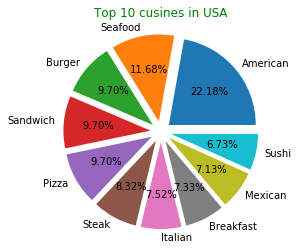

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
df=df[(df["Country Code"]==216)]

df.dropna(subset=['Cuisines'], inplace=True)

cus={}
for i in df.index:
    cuisine=df['Cuisines'][i].strip().split(',')
    for j in cuisine:
        j=j.strip()
        cus[j]=cus.get(j,0)+1

cus_name= sorted(cus, key=cus.get, reverse=True)[:10]
cus_count=[]

for i in cus_name:
    cus_count.append(cus[i])
    
exp=[0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12]
plt.pie(cus_count, autopct='%.2f%%', labels=cus_name, explode=exp)
plt.title('Top 10 cusines in USA', color='green')
plt.show()
 

## 5. Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

{'Agra': '4.01', 'Ahmedabad': '4.16', 'Allahabad': '3.41', 'Amritsar': '3.76', 'Aurangabad': '3.43', 'Bangalore': '4.50', 'Bhopal': '4.13', 'Bhubaneshwar': '3.97', 'Chandigarh': '4.11', 'Chennai': '4.32', 'Coimbatore': '4.17', 'Dehradun': '4.02', 'Faridabad': '3.48', 'Ghaziabad': '3.04', 'Goa': '4.16', 'Gurgaon': '3.74', 'Guwahati': '4.27', 'Hyderabad': '4.49', 'Indore': '4.00', 'Jaipur': '4.28', 'Kanpur': '3.85', 'Kochi': '4.14', 'Kolkata': '4.30', 'Lucknow': '4.32', 'Ludhiana': '4.08', 'Mangalore': '3.76', 'Mohali': '4.30', 'Mumbai': '4.22', 'Mysore': '3.76', 'Nagpur': '4.11', 'Nashik': '3.59', 'New Delhi': '3.77', 'Noida': '3.47', 'Panchkula': '4.20', 'Patna': '3.46', 'Puducherry': '3.74', 'Pune': '4.28', 'Ranchi': '3.57', 'Secunderabad': '4.55', 'Surat': '4.02', 'Vadodara': '4.13', 'Varanasi': '3.56', 'Vizag': '4.13'}


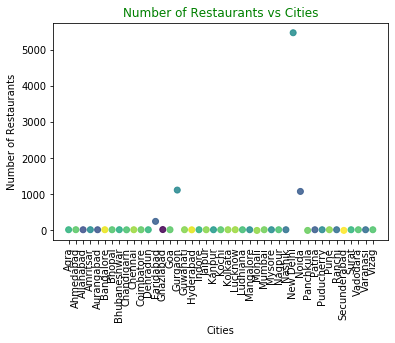

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path="C:\\Users\\RAHUL\\Documents\\Project _Zomato API-2\\zomato.csv"

data=pd.read_csv(path,encoding='latin')
df=data.copy()
df=df[(df["Country Code"]==1)]


votes_x_rating={}
v={}
res={}
for i in df.index:
    city= df['City'][i].strip()
    votes=df["Votes"][i]
    rating=df["Aggregate rating"][i]
    votes_x_rating[city]=votes_x_rating.get(city,0)+(votes*rating)
    v[city]=v.get(city,0)+votes
    res[city]=res.get(city,0)+1

weighted_rest_rating={}
for i in votes_x_rating:
    if v[i]==0:
        weighted_rest_rating[i]=0
    else:
        weighted_rest_rating[i]= "%.2f" % (votes_x_rating[i]/v[i])
        
x,y=[],[]
col=[]
for i in weighted_rest_rating:
    x.append(i)
    y.append(res[i])
    col.append(float(weighted_rest_rating[i]))

print(weighted_rest_rating)
plt.scatter(x,y, alpha=0.85, marker='o', c=col)

plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants vs Cities', color='green')
plt.xticks(rotation=90)

plt.show()
    
